In [1]:
import pandas as pd
import datetime
# Reads in clean data
data = pd.read_csv('./data/data_tweet.csv')
data.head(2)

,LANGUAGE,LOCATION,SENDER,MESSAGE,Impressions,NUMBER_FOLLOWERS,RETWEET_COUNT,Twitter Likes,IS_VERIFIED,HAS_URL,...,IS_QUOTE,IS_RETWEET,DATE,TIME,IS_IN_REPLY_TO,IS_NEWS_AGENCY,TWEET_COUNT,IS_MEDIA,IS_GOVT,IS_PEOPLE
0,en,USA,TurnKyBlue,RT @TristanSnell Get rid of train safety rules...,4414.0,4414.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2023-03-14,21:56:12,NaN,NaN,NaN,0,0,1
1,en,NaN,jrbkjrbk,RT @realTuckFrumper Ohio Sues Norfolk Southern...,1011.0,1011.0,0.0,0.0,0.0,1.0,...,0.0,1.0,2023-03-14,21:56:03,NaN,NaN,NaN,0,0,1


In [2]:
# Convert to datetime: We have the YEAR column, we have the 
data['YEAR'] = pd.DatetimeIndex(data['DATE']).year
data['DATE_TIME'] = data[['DATE', 'TIME']].apply(lambda x : datetime.datetime.strptime(x[0] + ' ' + x[1], '%Y-%m-%d %H:%M:%S'), axis =1 )
data['DATE_TIME'] = data['DATE_TIME'].apply(lambda x : x - datetime.timedelta(hours = 3))
data.drop(columns=['TIME', 'IS_NEWS_AGENCY'], inplace = True)
# data['TIME'] = data['TIME'].apply(lambda x : datetime.datetime.strptime(x, '%H:%M:%S').time())
# data['DATE'] = data['DATE'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))


In [3]:
# Basic information about the data
data.describe()

,Impressions,NUMBER_FOLLOWERS,RETWEET_COUNT,Twitter Likes,IS_VERIFIED,HAS_URL,IS_REPLY,IS_QUOTE,IS_RETWEET,IS_IN_REPLY_TO,TWEET_COUNT,IS_MEDIA,IS_GOVT,IS_PEOPLE,YEAR
count,6.029400e+04,8.522000e+04,71853.000000,60294.000000,85220.000000,85220.000000,85220.000000,85220.000000,85220.000000,24926.000000,24926.000000,85220.000000,85220.000000,85220.000000,85220.000000
mean,1.217450e+05,1.650710e+05,37.514926,24.009056,0.103098,0.719995,0.170664,0.039603,0.305421,0.104068,5.430113,0.086904,0.004412,0.908683,2022.999542
std,1.614649e+06,2.097119e+06,612.122207,694.783723,0.304088,0.500091,0.376217,0.195027,0.460588,0.305355,8.014435,0.281697,0.066277,0.288060,0.045572
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2012.000000
25%,1.490000e+02,1.550000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2023.000000
50%,8.780000e+02,8.920000e+02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2023.000000
75%,4.172000e+03,3.905250e+03,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,2023.000000
max,6.354483e+07,1.321976e+08,74444.000000,108314.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,93.000000,1.000000,1.000000,1.000000,2023.000000


In [4]:
# Null values
data.isna().sum()

LANGUAGE                0
LOCATION            35246
SENDER                  0
MESSAGE                 0
Impressions         24926
NUMBER_FOLLOWERS        0
RETWEET_COUNT       13367
Twitter Likes       24926
IS_VERIFIED             0
HAS_URL                 0
IS_REPLY                0
IS_QUOTE                0
IS_RETWEET              0
DATE                    0
IS_IN_REPLY_TO      60294
TWEET_COUNT         60294
IS_MEDIA                0
IS_GOVT                 0
IS_PEOPLE               0
YEAR                    0
DATE_TIME               0
dtype: int64

In [5]:
data.YEAR.value_counts()

2023    85198
2022       18
2020        1
2021        1
2012        1
2018        1
Name: YEAR, dtype: int64

In [6]:
data.columns

Index(['LANGUAGE', 'LOCATION', 'SENDER', 'MESSAGE', 'Impressions',
       'NUMBER_FOLLOWERS', 'RETWEET_COUNT', 'Twitter Likes', 'IS_VERIFIED',
       'HAS_URL', 'IS_REPLY', 'IS_QUOTE', 'IS_RETWEET', 'DATE',
       'IS_IN_REPLY_TO', 'TWEET_COUNT', 'IS_MEDIA', 'IS_GOVT', 'IS_PEOPLE',
       'YEAR', 'DATE_TIME'],
      dtype='object')

In [7]:

def map_categories(row):
    # if row['IS_NEWS_AGENCY'] == 1:
    #     return 'News'
    if row['IS_MEDIA'] == 1:
        return 'Media'
    elif row['IS_GOVT'] == 1:
        return 'Government'
    elif row['IS_PEOPLE'] == 1:
        return 'Public'
    else:
        return None

# create fourth column with categories
data['tweet_categories'] = data.apply(map_categories, axis=1)


In [8]:
data.tweet_categories.value_counts()

Public        77438
Media          7406
Government      376
Name: tweet_categories, dtype: int64

In [9]:
import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd

# create bar chart
fig = go.Figure(
    data=[go.Bar(x=data['tweet_categories'].value_counts().index,
                 y=data['tweet_categories'].value_counts().values,text=data['tweet_categories'].value_counts().values)],
    layout=go.Layout(title='Tweets by account type')
)

fig.show()


In [10]:
# data.loc[data['tweet_categories'] == 'Public'].values

In [11]:

# data.groupby(['DATE'])

data.head(2)


,LANGUAGE,LOCATION,SENDER,MESSAGE,Impressions,NUMBER_FOLLOWERS,RETWEET_COUNT,Twitter Likes,IS_VERIFIED,HAS_URL,...,IS_RETWEET,DATE,IS_IN_REPLY_TO,TWEET_COUNT,IS_MEDIA,IS_GOVT,IS_PEOPLE,YEAR,DATE_TIME,tweet_categories
0,en,USA,TurnKyBlue,RT @TristanSnell Get rid of train safety rules...,4414.0,4414.0,0.0,0.0,0.0,0.0,...,1.0,2023-03-14,NaN,NaN,0,0,1,2023,2023-03-14 18:56:12,Public
1,en,NaN,jrbkjrbk,RT @realTuckFrumper Ohio Sues Norfolk Southern...,1011.0,1011.0,0.0,0.0,0.0,1.0,...,1.0,2023-03-14,NaN,NaN,0,0,1,2023,2023-03-14 18:56:03,Public


In [12]:
data.LOCATION.value_counts(dropna=False)

NaN                    35246
USA                    29845
CAN                      903
United States            844
GBR                      601
                       ...  
Area 51                    1
Miami, Florida, USA        1
 California                1
Owensboro, KY              1
(City of Trees)            1
Name: LOCATION, Length: 5380, dtype: int64

In [13]:
data_fig = data.groupby(['DATE','YEAR','tweet_categories']).size()

In [14]:
data_fig = data_fig.to_frame().reset_index()
data_fig.head(2)

,DATE,YEAR,tweet_categories,0
0,2012-07-11,2012,Public,1
1,2018-04-17,2018,Public,1


In [15]:
data_fig = data_fig.drop(data_fig[data_fig.YEAR < 2023].index)
data_fig.YEAR.value_counts()

2023    111
Name: YEAR, dtype: int64

In [16]:
import plotly.express as px

fig = px.line(data_fig, x='DATE', y=0, color=data_fig.tweet_categories,
             labels=data_fig.tweet_categories)

fig.update_layout(
    title='Total tweets posted over time by Government, Media and Public accounts',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count of Tweets'))

fig.show()

In [17]:
fig = px.bar(data_fig, x='DATE', y=0, color=data_fig.tweet_categories,
             labels=data_fig.tweet_categories)

fig.update_layout(
    title='Count of tweets over time',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count of Tweets'))

fig.show()

In [18]:
data.columns

Index(['LANGUAGE', 'LOCATION', 'SENDER', 'MESSAGE', 'Impressions',
       'NUMBER_FOLLOWERS', 'RETWEET_COUNT', 'Twitter Likes', 'IS_VERIFIED',
       'HAS_URL', 'IS_REPLY', 'IS_QUOTE', 'IS_RETWEET', 'DATE',
       'IS_IN_REPLY_TO', 'TWEET_COUNT', 'IS_MEDIA', 'IS_GOVT', 'IS_PEOPLE',
       'YEAR', 'DATE_TIME', 'tweet_categories'],
      dtype='object')

In [19]:
# By hour of the day, when is it when eople tweets the most?
data.groupby([data['DATE_TIME'].dt.hour, 'tweet_categories'])[['RETWEET_COUNT', 'Twitter Likes']].mean().unstack()#.plot()

RETWEET_COUNT                        Twitter Likes  \
tweet_categories    Government       Media     Public    Government   
DATE_TIME                                                             
0                    15.666667   19.781553  31.108890     53.400000   
1                     3.500000   45.268817  29.481106      0.000000   
2                     7.000000   10.913462  28.625601      0.000000   
3                     1.000000   15.456790  28.334093      0.000000   
4                          NaN   37.027027  19.969302           NaN   
5                          NaN   19.727273   7.119917           NaN   
6                          NaN   18.241935  11.318182           NaN   
7                     2.000000   35.192308   4.781513      1.000000   
8                     4.000000   51.060606  24.895416      0.000000   
9                    28.333333   39.214575  45.442008     31.125000   
10                   32.583333   67.656140  26.929825      9.625000   
11                  496.588235   70.316195  20.616857   1691.444444   
12                  183.080000   59.764434  22.739242    282.307692   
13                  278.692308   52.981651  32.195676     88.785714   
14                  155.714286   66.221978  24.438855    173.565217   
15                  793.851852   66.659817  33.543345   3621.428571   
16                  309.108108   77.297539  36.346345    179.200000   
17                  105.222222   69.709677  44.054250     70.176471   
18                   58.200000   67.837647  40.869425     91.571429   
19                  849.080000   77.182039  33.751130    110.307692   
20                  205.900000  108.185096  17.965307     17.000000   
21                  303.437500  139.929054  41.110675     18.166667   
22                 3870.571429  419.472656  40.115603  14204.428571   
23                  323.777778   75.196911  35.111938     13.500000   

                                         
tweet_categories       Media     Public  
DATE_TIME                                
0                  28.885350   2.668325  
1                 112.953125   3.380727  
2                  24.585366  11.028512  
3                  51.507692   6.122192  
4                  41.093750   2.822785  
5                  35.826923   6.297974  
6                  59.392157   3.148802  
7                 174.983333   1.746554  
8                  35.316327   4.361856  
9                  91.480447  54.181257  
10                126.022936  11.275191  
11                 61.571918  11.080983  
12                 95.320755   4.669646  
13                 36.254545  14.640413  
14                 80.779503   5.919529  
15                100.775168   8.240971  
16                 42.108025  55.718474  
17                215.419463   9.547365  
18                 97.529605  13.951002  
19                131.929577  12.805668  
20                258.447811   6.147069  
21                184.495495  15.703166  
22                191.723958  11.233262  
23                 97.830846   9.327844

<AxesSubplot: xlabel='DATE_TIME'>

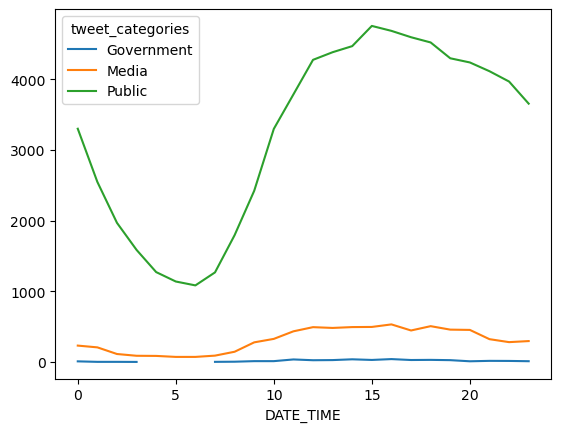

In [28]:
# By hour of the day, when is it when eople tweets the most?
data.groupby([data['DATE_TIME'].dt.hour, 'tweet_categories'])['MESSAGE'].count().unstack().plot()

In [22]:
len(data)


85220

# Separate these plots!

In [26]:
grouped_data = data.groupby([data['DATE_TIME'].dt.hour, 'tweet_categories'])['Twitter Likes'].mean()#.unstack().plot()


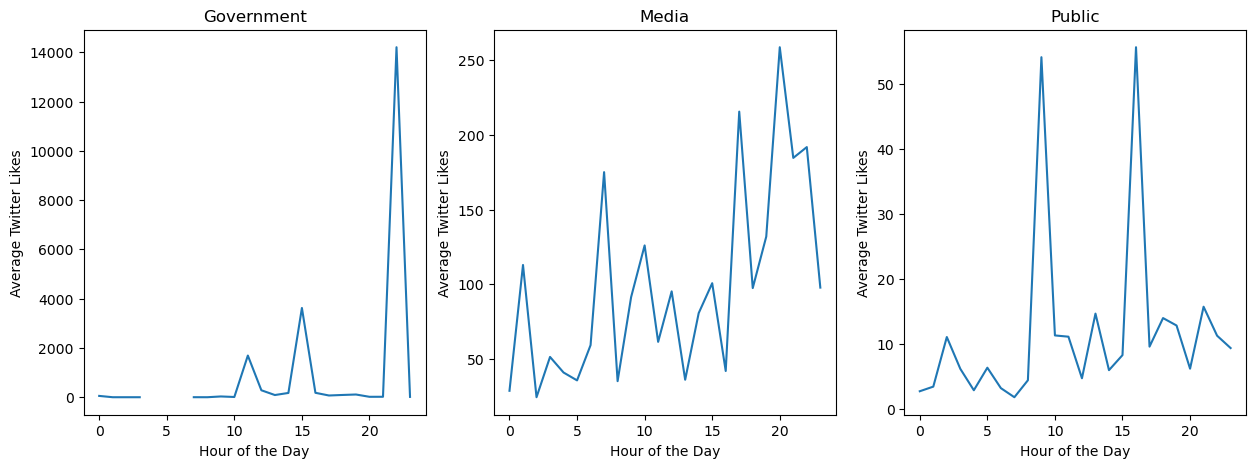

In [28]:
import matplotlib.pyplot as plt


reshaped_data = grouped_data.unstack()

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Loop over each subplot and plot the data for the corresponding category
for i, category in enumerate(reshaped_data.columns):
    reshaped_data[category].plot(ax=axes[i], title=category)
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Average Twitter Likes')

# Do something on Verified accounts?

In [44]:
data.columns

Index(['LANGUAGE', 'LOCATION', 'SENDER', 'MESSAGE', 'Impressions',
       'NUMBER_FOLLOWERS', 'RETWEET_COUNT', 'Twitter Likes', 'IS_VERIFIED',
       'HAS_URL', 'IS_REPLY', 'IS_QUOTE', 'IS_RETWEET', 'DATE',
       'IS_IN_REPLY_TO', 'TWEET_COUNT', 'IS_MEDIA', 'IS_GOVT', 'IS_PEOPLE',
       'YEAR', 'DATE_TIME', 'tweet_categories'],
      dtype='object')

In [48]:
data_fig2 = data.groupby(['DATE','YEAR','IS_VERIFIED']).size()
data_fig2 = data_fig2.to_frame().reset_index()
data_fig2 = data_fig2.drop(data_fig2[data_fig2.YEAR < 2023].index)
data_fig2.YEAR.value_counts()


2023    78
Name: YEAR, dtype: int64

In [65]:
data_fig2.IS_VERIFIED.dtype

dtype('float64')

In [72]:
data_fig2['IS_VERIFIED'] = data_fig2['IS_VERIFIED'].map({0.0: 'Not Verified', 1.0: 'Verified'})

In [73]:
fig = px.line(data_fig2, x='DATE', y=0, color=data_fig2.IS_VERIFIED,
             labels=data_fig2.IS_VERIFIED)


fig.update_layout(
    title='Total tweets posted over time by verified accounts',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count of Tweets'))


fig.show()